In this, Jupyter notebook, I used the PhD applications dataset provided by my master thesis advisor. I used basic and known machine learnin methods to predict if the student is accepted, waitlisted or rejected.. Table 1 shows ML models without scaled, table 2 shows with ML models with scaling, Table 3 shows ML models with scaled data set and grid search.

Table of Contents
1. Import Libraries
2. Introduction
   - Data Set
     - Variable Description
3. Data Analysis (Visualization)
4. Data Prepocessing
    1. Handling Missing Values
    2. Converting categorical variables to numeric variables. 
5. Overview of the Methods.
    1. Decision Tree
    2. Logistic Regression
    3. Random Forest
    4. Stochastic Gradient Descent
    5. KNN
    6. Gaussian Naive Bayes
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
6. A few models with the grid search
    1. Decision Tree (DT)
    2. Logistic Regression (LG)
    3. Random Forest (RF)
    4. Stochastic Gradient Descent (SGD
    5. KNN
    6. Gaussian Naive Bayes (GNB)
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
    12. Cat Boost
    13. Light GBM
    14. Which Model is the best ? Table 4  
7. Implementing h2o AutoML packages
    1. Deep Learning Estimator
    2. Deep Water Estimator
8. Appendix
9. References



# Import Libraries

In [166]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [167]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats


In [168]:
# For data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# All the models we will apply
from sklearn import linear_model


from sklearn.model_selection import train_test_split







from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix


#from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier






from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge


from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [169]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MStat"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Introduction


The data used for this analysis was collected from a major Universities Graduate Mathematics Application system for students applying for the Mathematics PHD program. The information is used by the department of mathematics to determine which applicants will be admitted into the graduate program. Each year members of the department of mathematics review each graduate application and give the prospective student a rating score between one and five, five being the best, with all values in between possible. This rating score determines whether an applicant is accepted, rejected, or put on a waitlist for the Universities Mathematics graduate program. 

The rating score (or just RATING) and whether an applicant is accepted, rejected, or put on a waitlist (DECISION) are the variables of interest for this project. The purpose of this research is to create both a regression and classification models that can accurately predict the RATING and DECISION, based on the data submitted by the student. The models we are using includes Random Rorest, Gradient Boosting, Generalized Linear, Stacked Ensemble, XGBoost and Deep learning. 



## Data Set

The data is collected in a spreadsheet for easy visual inspection. Each row of data represents a single applicant identified by a unique identification number. Each application consists of the qualitative and quantitative data described in the table below. Note that he qualitative variables are identified by blue highlighting.The following variables make up the columns of the spreadsheet. Note that some of these fields are optional for the student to submit, so not every field has an entry for every student. This creates an issues of missing data, and later on we will discuss how this issue was dealt with.

In [170]:
from IPython.display import HTML, display
import tabulate

table = [["Applicant Client ID","Application ID"],
         ["Emphasis Area",'First choice of study area'],
         ["Emphasis Area 2",'Secondary choice of study area'],
         ["Emphasis Area 3",'Tertiary choice of area they would like to study area'], 
         ["UU_APPL_CITIZEN","US Citizen (Yes or No)"],
         ["AGE",'Age of the applicant in years'],
         ["SEX",'Gender of the applicant: Male or Female'], 
         ["LOW_INCOME",'If the applicant is coming from low income family'],
         ["UU_FIRSTGEN",'If the appicant is the first generation attending grad school'],
         ["UU_APPL_NTV_LANG","Applicant's native language"], 
         ["HAS_LANGUAGE_TEST",'Foreign Language Exam, if applicable (TOEFL IBT, IELTS, or blank)'],
         ["TEST_READ",'Score on the reading part of TOEFL'],
         ["TEST_SPEAK",'Score on the speaking part of TOEFL'], 
         ["TEST_WRITE",'Score on the writing part of TOEFL'],
         ["TEST_LISTEN",'Score on the listening part of TOEFL'],
         ["MAJOR",'Applicants undergraduate major'], 
         ["GPA",'Applicants GPA'],
         ["NUM_PREV_INSTS",'Number of the previous instituions student studied'],
         ["HAS_GRE_GEN",'If applicant has taken GRE General exam'], 
         ["GRE_VERB",'Raw score on verbal part of the GRE'],
         ["GRE_QUANT",'Raw score on the quantitative part of the GRE'],
         ["GRE_AW",'Raw score on analytical writing part of the GRE'], 
         ["HAS_GRE_SUBJECT",'If applicant has taken GRE Subject exam'],
         ["GRE_SUB",'Raw score on Math subject GRE'],
         ["NUM_RECOMMENDS",'Number of recommenders of the applicant'],
         ["R_AVG_ORAL","Average of recommender's for applicants oral excellence" ], 
         ["R_AVG_WRITTEN","Average of recommender's for applicants oral excellence"],
         ["R_AVG_ACADEMIC","Average of recommender's for applicants oral excellence"], 
         ["R_AVG_KNOWLEDGE","Average of recommender's for applicants oral excellence"],
         ["R_AVG_EMOT","Average of recommender's for applicants oral excellence"],
         ["R_AVG_MOT","Average of recommender's for applicants oral excellence"], 
         ["R_AVG_RES","Average of recommender's for applicants oral excellence"],
         ["R_AVG_RATING","Average of recommender's for applicants oral excellence"],
         ["RATING",'Rating score (any value between 1-5)'], 
         ["DECISION",'Faculty application decision (Accept, Reject, or Waitlist)'], ]
headers = ["Variable", "Description"]
print(display(HTML(tabulate.tabulate(table, headers,tablefmt='html'))))

Variable,Description
Applicant Client ID,Application ID
Emphasis Area,First choice of study area
Emphasis Area 2,Secondary choice of study area
Emphasis Area 3,Tertiary choice of area they would like to study area
UU_APPL_CITIZEN,US Citizen (Yes or No)
AGE,Age of the applicant in years
SEX,Gender of the applicant: Male or Female
LOW_INCOME,If the applicant is coming from low income family
UU_FIRSTGEN,If the appicant is the first generation attending grad school
UU_APPL_NTV_LANG,Applicant's native language


None


The data set includes 759 graduate applications, that were submitted for admission in Fall 2016, Fall 2017, Fall 2018 and Fall 2019. There are various missing data points throughout both the dataset. The tables below describes the number of missing values for each variable for whole data set. Missing data is represented by shorter columns. The bottom of the table lists the various variable names. The top of the table represents how many data entries we have. On the left of the table is the percentage of the missing data for a specific category.  The numbers on the right of the table records the number of variables that each variable has. For example, on the bottom columns starting from TEST_READ, TEST_SPEAK, TEST_WRITE and TETS_LISTEN have shorter columns.

The applicants age (AGE) was calculated using the applicants birthday and is accurate as of 1 January of the year in which they applied. Also, since all universities do not use the same GPA scale, GPA values over four were reviewed and scaled based on information deduced from the applicants resume. 

## Data Analysis

Load the data and see the first four rows of the data.

In [171]:
students =  pd.read_csv('Sergazy_last.csv')
students.head(4)

,Applicant_Client_ID,Emphasis Area,Emphasis Area 2,Emphasis Area 3,UU_APPL_CITIZEN,CTZNSHP,AGE,SEX,LOW_INCOME,UU_FIRSTGEN,...,R_AVG_ORAL,R_AVG_WRITTEN,R_AVG_ACADEMIC,R_AVG_KNOWLEDGE,R_AVG_EMOT,R_AVG_MOT,R_AVG_RES,R_AVG_RATING,RATING,DECISION
0,3554048,Probability,Mathematical Biology,Applied Mathematics,Yes,UNITED STATES,28.7,Male,No,Unspecified,...,12.5,11.3,15.0,15.0,20.0,15.0,12.5,20.0,3.67,Reject
1,3698974,Mathematical Biology,Geometry/Topology,0,Yes,UNITED STATES,42.4,Female,Yes,Y,...,20.0,13.3,16.7,13.3,16.7,16.7,10.0,20.0,4.50,Waitlist
2,3708400,Statistics,0,0,Yes,UNITED STATES,35.8,Male,Unspecified,Unspecified,...,20.0,20.0,20.0,16.7,20.0,16.7,16.7,26.7,3.25,Reject
3,3755025,Geometry/Topology,Algebraic Geometry,Representation Theory,Yes,UNITED STATES,30.2,Male,Not Sure,Unspecified,...,6.7,6.7,6.7,6.7,6.7,6.7,6.7,26.7,4.10,Reject


Let us have an idea about the data. See the information about it. We will see what kind of variables we have.

In [172]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 36 columns):
Applicant_Client_ID    759 non-null int64
Emphasis Area          759 non-null object
Emphasis Area 2        759 non-null object
Emphasis Area 3        759 non-null object
UU_APPL_CITIZEN        759 non-null object
CTZNSHP                759 non-null object
AGE                    759 non-null float64
SEX                    759 non-null object
LOW_INCOME             759 non-null object
UU_FIRSTGEN            759 non-null object
UU_APPL_NTV_LANG       759 non-null object
HAS_LANGUAGE_TEST      759 non-null object
TEST_READ              272 non-null float64
TEST_SPEAK             272 non-null float64
TEST_WRITE             272 non-null float64
TEST_LISTEN            272 non-null float64
MAJOR                  759 non-null object
GPA                    759 non-null float64
NUM_PREV_INSTS         759 non-null int64
HAS_GRE_GEN            759 non-null object
GRE_VERB               647 non-

There 759 number of observations with 36 columns.

Let us the number of the missing values for each variable.

In [173]:
students.isnull().sum()

Applicant_Client_ID      0
Emphasis Area            0
Emphasis Area 2          0
Emphasis Area 3          0
UU_APPL_CITIZEN          0
CTZNSHP                  0
AGE                      0
SEX                      0
LOW_INCOME               0
UU_FIRSTGEN              0
UU_APPL_NTV_LANG         0
HAS_LANGUAGE_TEST        0
TEST_READ              487
TEST_SPEAK             487
TEST_WRITE             487
TEST_LISTEN            487
MAJOR                    0
GPA                      0
NUM_PREV_INSTS           0
HAS_GRE_GEN              0
GRE_VERB               112
GRE_QUANT              112
GRE_AW                 112
HAS_GRE_SUBJECT          0
GRE_SUB                205
NUM_RECOMMENDS           0
R_AVG_ORAL               0
R_AVG_WRITTEN            0
R_AVG_ACADEMIC           0
R_AVG_KNOWLEDGE          0
R_AVG_EMOT               0
R_AVG_MOT                0
R_AVG_RES                0
R_AVG_RATING             0
RATING                   0
DECISION                 0
dtype: int64

## Data Visualization

Right now let us see the relations between variables via visualization.

In [174]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [175]:
students['DECISION'].value_counts()

Reject      403
Waitlist    242
Admit       114
Name: DECISION, dtype: int64

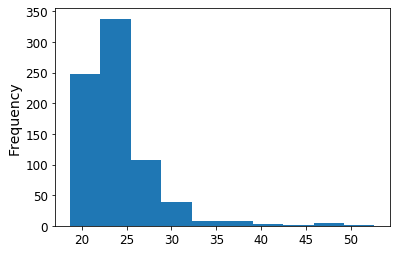

In [176]:
students['AGE'].plot(kind = 'hist')

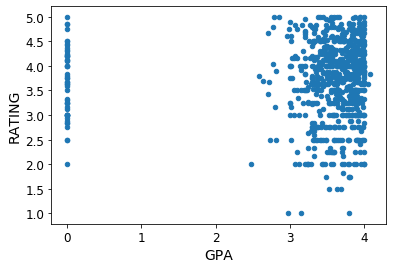

In [177]:
students.plot(kind = 'scatter',x = 'GPA',y = 'RATING')

Saving figure students_rating_GPA_scatterplot


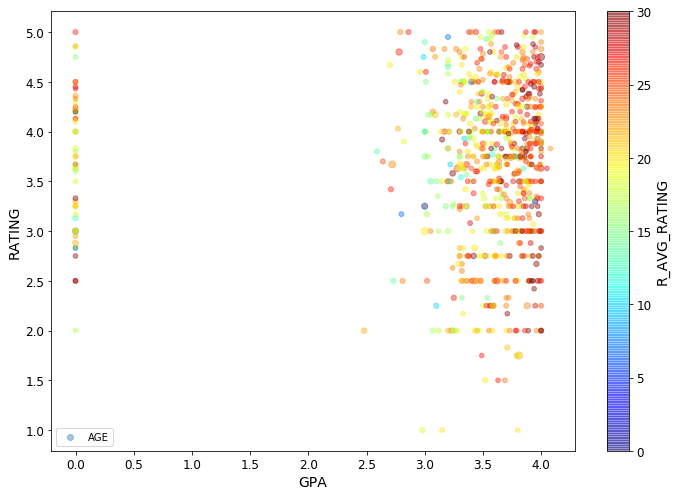

In [178]:
students.plot(kind="scatter", x="GPA", y="RATING", alpha=0.4,
    s=students["AGE"], label="AGE", figsize=(10,7),
    c="R_AVG_RATING", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("students_rating_GPA_scatterplot")

Let us see survival according to the who variable.

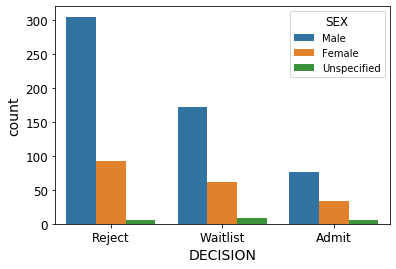

In [179]:
sns.countplot(data = students, x = 'DECISION', hue = 'SEX')

In [180]:
#sns.countplot(data = students, x = 'DECISION', hue = 'MAJOR')

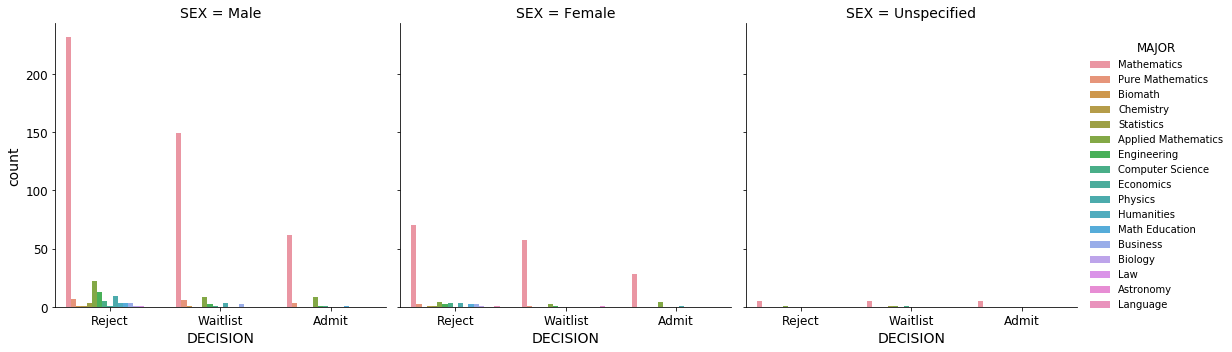

In [181]:
sns.catplot(data = students, x = 'DECISION', hue = 'MAJOR', kind = 'count', col = 'SEX')

These histogram does not tell you much except if unspecified sex has equal number of being accepted,rejected, or waitlisted. 

## Decision according to AGE and GPA

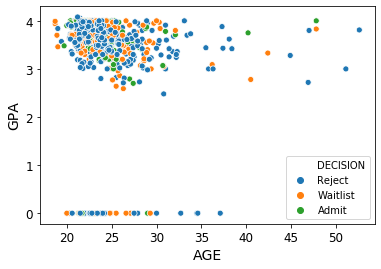

In [182]:
sns.scatterplot(x = 'AGE',y = 'GPA', data =students,hue = 'DECISION')

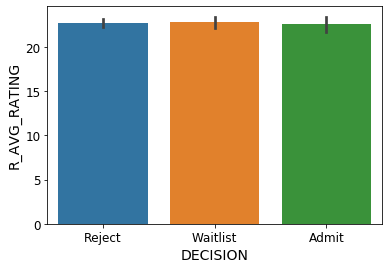

In [183]:
sns.barplot(y = 'R_AVG_RATING',x = 'DECISION', data = students)

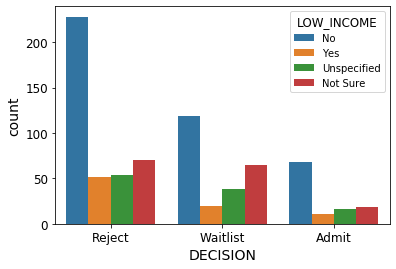

In [184]:
sns.countplot(data = students, x = 'DECISION', hue = 'LOW_INCOME')
#UU_FIRSTGEN            
#UU_APPL_NTV_LANG 

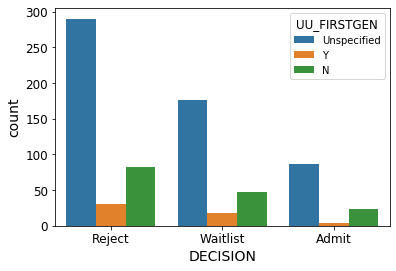

In [185]:
sns.countplot(data = students, x = 'DECISION', hue = 'UU_FIRSTGEN')

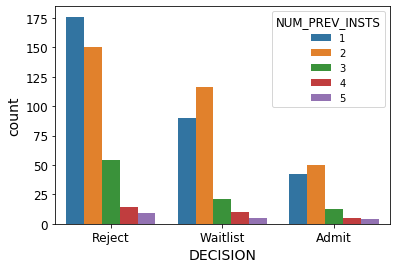

In [186]:
sns.countplot(data = students, x = 'DECISION', hue = 'NUM_PREV_INSTS')

These histograms show that low income, being first generation in your family coming to grad school or number of previous institutions you studied is not much of relavent to get accepted. 

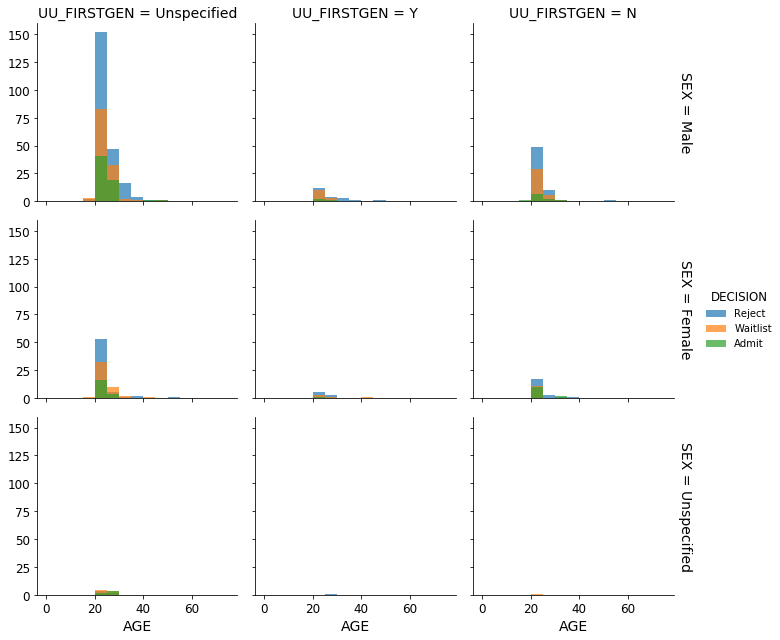

In [187]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(students, row='SEX', col='UU_FIRSTGEN', hue='DECISION', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'AGE', kde=False, bins=bins, hist_kws=dict(alpha=0.7))
g.add_legend()  
plt.show()  

Here, We do not any see any blue color in left bottom corner.  We see that unspecified first generation and unspecified sex helped to increase the chance of getting admitted. 

This shows that waitlisted people have higher average than being admitted.

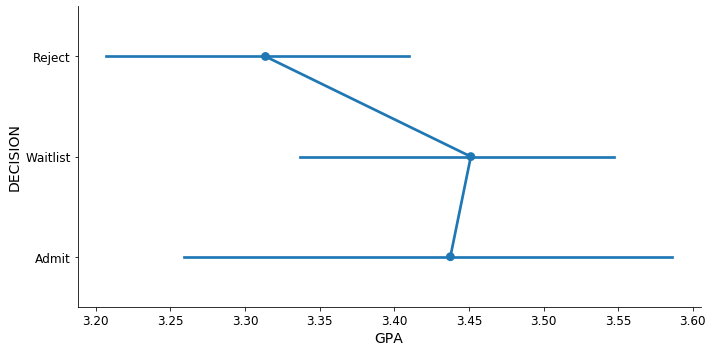

In [188]:
sns.catplot('GPA','DECISION',data = students, aspect = 2.0, kind = 'point' )

Below we see that higher number of previous instutions is better to get admitted.

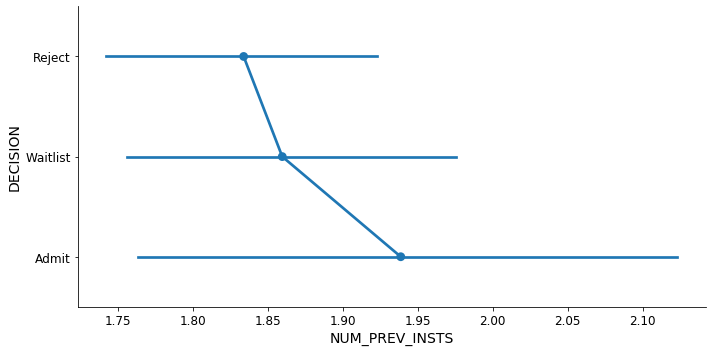

In [189]:
sns.catplot('NUM_PREV_INSTS','DECISION',data = students, aspect = 2.0, kind = 'point' )

### Using groupby to see the relations

In [190]:
print(type(students.groupby('SEX').mean()))
students.groupby('SEX').mean()

<class 'pandas.core.frame.DataFrame'>


,Applicant_Client_ID,AGE,TEST_READ,TEST_SPEAK,TEST_WRITE,TEST_LISTEN,GPA,NUM_PREV_INSTS,GRE_VERB,GRE_QUANT,...,NUM_RECOMMENDS,R_AVG_ORAL,R_AVG_WRITTEN,R_AVG_ACADEMIC,R_AVG_KNOWLEDGE,R_AVG_EMOT,R_AVG_MOT,R_AVG_RES,R_AVG_RATING,RATING
SEX,,,,,,,,,,,,,,,,,,,,,
Female,3.927072e+06,23.865241,26.148936,22.308511,23.744681,25.680851,3.493529,1.877005,155.368750,163.937500,...,3.197861,14.771658,14.660428,16.567914,16.156150,16.290374,17.993048,14.368984,22.209091,3.754545
Male,3.916641e+06,24.333816,27.418981,21.875000,24.476852,26.037037,3.328879,1.853526,156.038217,166.065817,...,3.160940,14.212477,14.263291,16.847920,16.963834,15.775769,17.888969,14.633635,22.992043,3.649747
Unspecified,3.906575e+06,24.073684,27.333333,20.166667,24.222222,22.666667,3.595789,1.789474,153.187500,166.437500,...,3.421053,12.584211,12.963158,16.300000,15.752632,15.005263,16.542105,13.442105,20.826316,4.089474


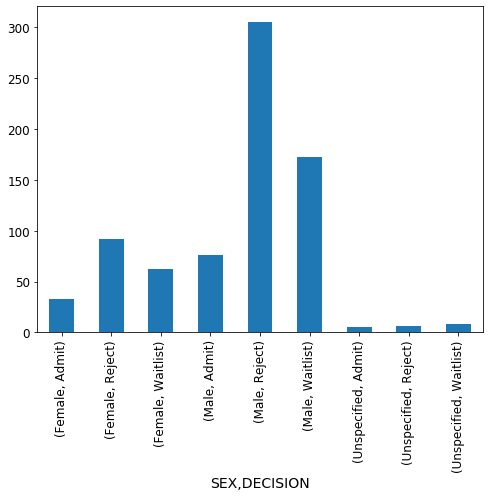

In [191]:
#students.groupby('SEX').sum().plot(kind='bar');
students.groupby(['SEX', 'DECISION'] )['DECISION'].count().plot.bar(figsize=(8, 6));

In [192]:
students.groupby(['SEX', 'DECISION'] )['DECISION'].count().unstack('SEX')

SEX,Female,Male,Unspecified
DECISION,,,
Admit,33,76,5
Reject,92,305,6
Waitlist,62,172,8


In [193]:
students.groupby(['SEX', 'DECISION','UU_FIRSTGEN'] )['DECISION'].count().unstack('SEX')

SEX                   Female   Male  Unspecified
DECISION UU_FIRSTGEN                            
Admit    N              12.0   11.0          NaN
         Unspecified    20.0   62.0          5.0
         Y               1.0    3.0          NaN
Reject   N              22.0   61.0          NaN
         Unspecified    62.0  223.0          5.0
         Y               8.0   21.0          1.0
Waitlist N              11.0   36.0          1.0
         Unspecified    46.0  123.0          7.0
         Y               5.0   13.0          NaN

In [194]:
#students.groupby(['SEX', 'DECISION','UU_FIRSTGEN'] )['DECISION'].count().unstack(1).plot.bar(figsize=(8, 6));

## Data Prepocessing

###  Handling Missing values

In [195]:
students.isnull().sum()

Applicant_Client_ID      0
Emphasis Area            0
Emphasis Area 2          0
Emphasis Area 3          0
UU_APPL_CITIZEN          0
CTZNSHP                  0
AGE                      0
SEX                      0
LOW_INCOME               0
UU_FIRSTGEN              0
UU_APPL_NTV_LANG         0
HAS_LANGUAGE_TEST        0
TEST_READ              487
TEST_SPEAK             487
TEST_WRITE             487
TEST_LISTEN            487
MAJOR                    0
GPA                      0
NUM_PREV_INSTS           0
HAS_GRE_GEN              0
GRE_VERB               112
GRE_QUANT              112
GRE_AW                 112
HAS_GRE_SUBJECT          0
GRE_SUB                205
NUM_RECOMMENDS           0
R_AVG_ORAL               0
R_AVG_WRITTEN            0
R_AVG_ACADEMIC           0
R_AVG_KNOWLEDGE          0
R_AVG_EMOT               0
R_AVG_MOT                0
R_AVG_RES                0
R_AVG_RATING             0
RATING                   0
DECISION                 0
dtype: int64

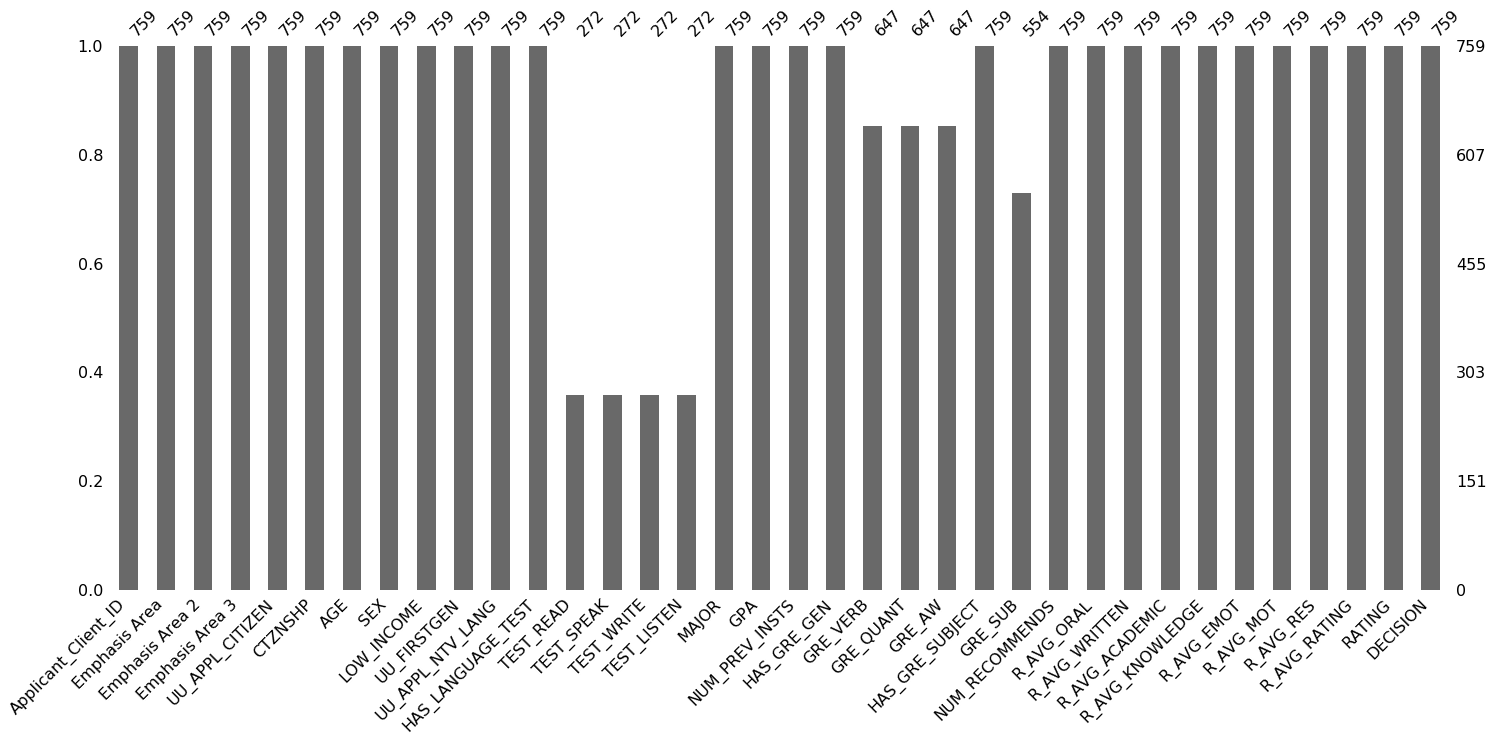

In [196]:
import missingno as msno
fig = plt.figure()
msno.bar(students)
fig.savefig('missing_data.png')

First we drop Applicant_Client_ID.

In [197]:
students = students.drop('Applicant_Client_ID',axis =1)

By looking here, either we can get rid off 8 variables that have missing values or we can fill them mean, median or common values.

First, let us take a look of GPA. We know GPA should not be higher than 4. Let us see if there is GPA higher than 4.

In [198]:
students['GPA'].nlargest(6)

733    4.08
105    4.05
34     4.00
36     4.00
69     4.00
114    4.00
Name: GPA, dtype: float64

These tell us we have two student entered their GPA higher than 4. We will equal them to 4.00 to be consistent. Let us make them equal to 4.00.

In [199]:
students.loc[733,'GPA'] = 4.00
students.loc[105,'GPA'] = 4.00

In [200]:
students.columns

Index(['Emphasis Area', 'Emphasis Area 2', 'Emphasis Area 3',
       'UU_APPL_CITIZEN', 'CTZNSHP', 'AGE', 'SEX', 'LOW_INCOME', 'UU_FIRSTGEN',
       'UU_APPL_NTV_LANG', 'HAS_LANGUAGE_TEST', 'TEST_READ', 'TEST_SPEAK',
       'TEST_WRITE', 'TEST_LISTEN', 'MAJOR', 'GPA', 'NUM_PREV_INSTS',
       'HAS_GRE_GEN', 'GRE_VERB', 'GRE_QUANT', 'GRE_AW', 'HAS_GRE_SUBJECT',
       'GRE_SUB', 'NUM_RECOMMENDS', 'R_AVG_ORAL', 'R_AVG_WRITTEN',
       'R_AVG_ACADEMIC', 'R_AVG_KNOWLEDGE', 'R_AVG_EMOT', 'R_AVG_MOT',
       'R_AVG_RES', 'R_AVG_RATING', 'RATING', 'DECISION'],
      dtype='object')

According to these website, https://www.prepscholar.com/toefl/blog/what-is-the-average-toefl-score/

According to this website, United States's average TOEFL score is for Reading 21, for Listening 23, for Speaking 23, and for Writing 22. Total of these scores is 89. We will see first average scores other students average TOEFL score for each section.

In [201]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#       print(students.head())

In [202]:
students.groupby('SEX').mean()

,AGE,TEST_READ,TEST_SPEAK,TEST_WRITE,TEST_LISTEN,GPA,NUM_PREV_INSTS,GRE_VERB,GRE_QUANT,GRE_AW,...,NUM_RECOMMENDS,R_AVG_ORAL,R_AVG_WRITTEN,R_AVG_ACADEMIC,R_AVG_KNOWLEDGE,R_AVG_EMOT,R_AVG_MOT,R_AVG_RES,R_AVG_RATING,RATING
SEX,,,,,,,,,,,,,,,,,,,,,
Female,23.865241,26.148936,22.308511,23.744681,25.680851,3.493102,1.877005,155.368750,163.937500,3.868750,...,3.197861,14.771658,14.660428,16.567914,16.156150,16.290374,17.993048,14.368984,22.209091,3.754545
Male,24.333816,27.418981,21.875000,24.476852,26.037037,3.328788,1.853526,156.038217,166.065817,3.757962,...,3.160940,14.212477,14.263291,16.847920,16.963834,15.775769,17.888969,14.633635,22.992043,3.649747
Unspecified,24.073684,27.333333,20.166667,24.222222,22.666667,3.595789,1.789474,153.187500,166.437500,3.468750,...,3.421053,12.584211,12.963158,16.300000,15.752632,15.005263,16.542105,13.442105,20.826316,4.089474


## Imputing the Missing Values

In [203]:
g_mean = students.groupby('SEX').mean()
#df.loc[df.Age.isnull() & (df.Sex == 'female'),'Age'] = g_mean['Age']['female']
#df.loc[df.Age.isnull() & (df.Sex == 'male'), 'Age'] = g_mean['Age']['male']

# Fill the TEST_READ
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Male'),'TEST_READ'] = g_mean['TEST_READ']['Male'] 
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Female'),'TEST_READ'] = g_mean['TEST_READ']['Female']
students.loc[students.TEST_READ.isnull() & (students.SEX == 'Unspecified'),'TEST_READ'] = g_mean['TEST_READ']['Unspecified']

# Fill the TEST_SPEAK
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Male'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Male'] 
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Female'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Female']
students.loc[students.TEST_SPEAK.isnull() & (students.SEX == 'Unspecified'),'TEST_SPEAK'] = g_mean['TEST_SPEAK']['Unspecified']

# Fill the TEST_LISTEN
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Male'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Male'] 
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Female'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Female']
students.loc[students.TEST_LISTEN.isnull() & (students.SEX == 'Unspecified'),'TEST_LISTEN'] = g_mean['TEST_LISTEN']['Unspecified']

# Fill the TEST_WRITE
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Male'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Male'] 
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Female'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Female']
students.loc[students.TEST_WRITE.isnull() & (students.SEX == 'Unspecified'),'TEST_WRITE'] = g_mean['TEST_WRITE']['Unspecified']

# Fill the GRE_VERB
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Male'),'GRE_VERB'] = g_mean['GRE_VERB']['Male'] 
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Female'),'GRE_VERB'] = g_mean['GRE_VERB']['Female']
students.loc[students.GRE_VERB.isnull() & (students.SEX == 'Unspecified'),'GRE_VERB'] = g_mean['GRE_VERB']['Unspecified']

# Fill the GRE_QUANT
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Male'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Male'] 
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Female'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Female']
students.loc[students.GRE_QUANT.isnull() & (students.SEX == 'Unspecified'),'GRE_QUANT'] = g_mean['GRE_QUANT']['Unspecified']

# Fill the GRE_AW
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Male'),'GRE_AW'] = g_mean['GRE_AW']['Male'] 
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Female'),'GRE_AW'] = g_mean['GRE_AW']['Female']
students.loc[students.GRE_AW.isnull() & (students.SEX == 'Unspecified'),'GRE_AW'] = g_mean['GRE_AW']['Unspecified']


# Fill the GRE_SUB
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Male'),'GRE_SUB'] = g_mean['GRE_SUB']['Male'] 
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Female'),'GRE_SUB'] = g_mean['GRE_SUB']['Female']
students.loc[students.GRE_SUB.isnull() & (students.SEX == 'Unspecified'),'GRE_SUB'] = g_mean['GRE_SUB']['Unspecified']




#students.loc[students.TEST_LISTEN.isnull() & (students.CTZNSHP == 'UNITED STATES'),'TEST_LISTEN'] = listen_mean 
#students.loc[students.TEST_WRITE.isnull() & (students.CTZNSHP == 'UNITED STATES'),'TEST_WRITE'] = write_mean

We will replaces the missing values of any variables with the mean of other observations for particular variable.

In [204]:
students.isnull().sum()

Emphasis Area        0
Emphasis Area 2      0
Emphasis Area 3      0
UU_APPL_CITIZEN      0
CTZNSHP              0
AGE                  0
SEX                  0
LOW_INCOME           0
UU_FIRSTGEN          0
UU_APPL_NTV_LANG     0
HAS_LANGUAGE_TEST    0
TEST_READ            0
TEST_SPEAK           0
TEST_WRITE           0
TEST_LISTEN          0
MAJOR                0
GPA                  0
NUM_PREV_INSTS       0
HAS_GRE_GEN          0
GRE_VERB             0
GRE_QUANT            0
GRE_AW               0
HAS_GRE_SUBJECT      0
GRE_SUB              0
NUM_RECOMMENDS       0
R_AVG_ORAL           0
R_AVG_WRITTEN        0
R_AVG_ACADEMIC       0
R_AVG_KNOWLEDGE      0
R_AVG_EMOT           0
R_AVG_MOT            0
R_AVG_RES            0
R_AVG_RATING         0
RATING               0
DECISION             0
dtype: int64

In [205]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #    print(citizenship.get_group('UNITED STATES'))

In [206]:
#students.info()

Let us see the histograms of each variables now.

Saving figure attribute_histogram_plots


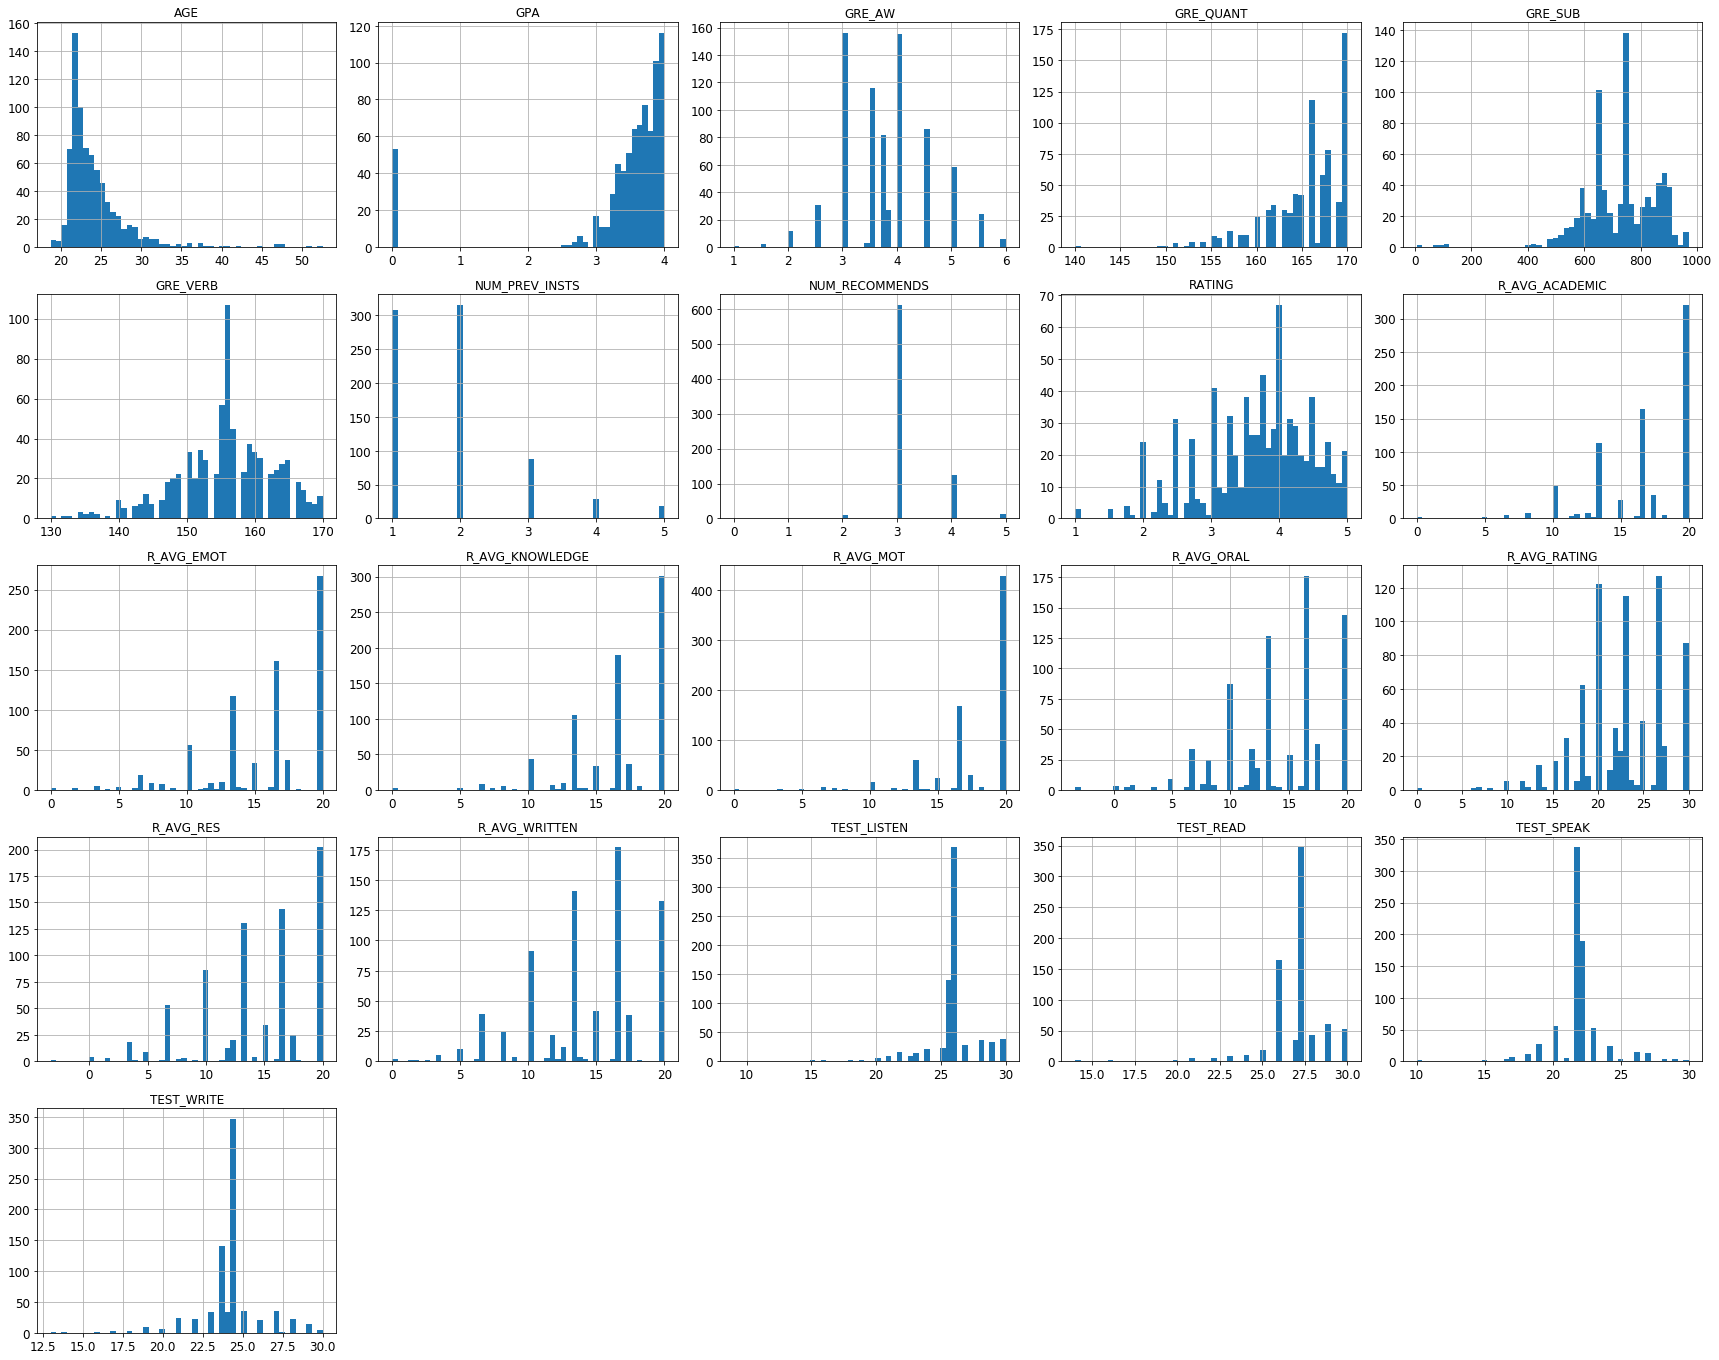

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
students.hist(bins=50, figsize=(24,19))
save_fig("attribute_histogram_plots")
plt.show()

## Target Variable


 mu = 3.69 and sigma = 0.78



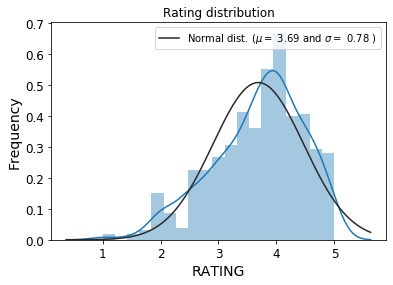

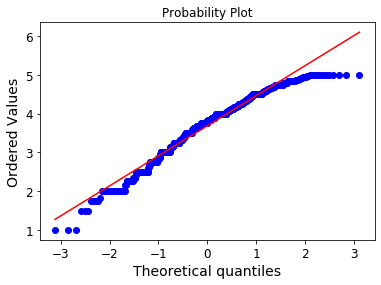

In [208]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(students['RATING'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(students['RATING'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rating distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(students['RATING'], plot=plt)
plt.show()

This is slightly left-skewed. But we will keep it this way. 

Now the data almost ready. We would like to convert categorical variables to numeric variables. 

### Converting categorical variables to numeric variables.

In [209]:
#students.head(12)

In [210]:
students_ce = students.copy()

import category_encoders as ce


encoder = ce.BinaryEncoder(cols=['Emphasis Area','Emphasis Area 2','Emphasis Area 3','UU_APPL_CITIZEN',
                                 'CTZNSHP','SEX','LOW_INCOME','UU_FIRSTGEN','UU_APPL_NTV_LANG',
                                 'HAS_LANGUAGE_TEST','HAS_GRE_GEN','HAS_GRE_SUBJECT','MAJOR'
                                 
                                ])
df_binary = encoder.fit_transform(students_ce)

df_binary.head()
df = df_binary
#df_binary.shape
#df_binary.info()

In [211]:
#df.info()

First, we will estimate DECISION using RATING variable. 

## Splitting Data Set

In [212]:
# let us divide this into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != 'DECISION'], 
    df['DECISION'], test_size = 0.2, random_state=0)

In [213]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(607, 72)
(607,)
(152, 72)
(152,)


In [ ]:
s

In [55]:
#X_train.info()
#Y_train

In [50]:
#cleanup_nums = {"DECISION": {"Admit": 1, "Waitlist": 2, "Reject": 3 }}
#df.replace(cleanup_nums, inplace=True)

In [51]:
#df["DECISION"] = df["DECISION"].astype('category')

In [52]:
#df.info()

## Scaling

In [214]:
#This is a crucial step in rescaling input data so that all the features are mean zero with a unit variance. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Machine Learning to predict DECISION using RATING

## Adaptive Boosting

In [77]:

classifier = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
adaboost = cm.trace()/cm.sum()
print('Accuracy on a test set: ', adaboost)

Accuracy on a train set:  0.7248764415156508
[[ 8  5 10]
 [ 1 66 12]
 [ 5 11 34]]
Accuracy on a test set:  0.7105263157894737


## Decision Tree

In [63]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
d_tree = cm.trace()/cm.sum()
print('Accuracy on a test set: ', d_tree)

Accuracy on a train set:  1.0
[[ 6  5 12]
 [ 2 59 18]
 [16 10 24]]
Accuracy on a test set:  0.5855263157894737


## Gaussian Naive Bayes

In [69]:
# classifier = GaussianNB()
# classifier.fit(X_train, Y_train)
# print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

# #how about on a test set
# Y_pred = classifier.predict(X_test)
# cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
# gnb=cm.trace()/cm.sum()
# print('Accuracy on a test set: ', gnb)

## K Nearest Neighbor

In [67]:
classifier = KNeighborsClassifier(leaf_size = 100, p=2)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
knn = cm.trace()/cm.sum()
print('Accuracy on a test set: ', knn)

Accuracy on a train set:  0.7051070840197694
[[ 5 11  7]
 [ 3 57 19]
 [ 6 29 15]]
Accuracy on a test set:  0.506578947368421


## Linear Support Vector Machine

In [75]:
classifier = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
lsvm = cm.trace()/cm.sum()
print('Accuracy on a test set: ', lsvm)

Accuracy on a train set:  0.7413509060955519
[[ 8  6  9]
 [ 3 60 16]
 [17 12 21]]
Accuracy on a test set:  0.5855263157894737


## Logistic Regression

In [64]:
classifier = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
log_regr= cm.trace()/cm.sum()
print('Accuracy on a test set: ', log_regr)

Accuracy on a train set:  0.7380560131795717
[[11  4  8]
 [ 3 57 19]
 [18  9 23]]
Accuracy on a test set:  0.5986842105263158


## Random Forest

In [65]:
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
rf = cm.trace()/cm.sum()
print('Accuracy on a test set: ', rf)

Accuracy on a train set:  1.0
[[ 3  7 13]
 [ 1 66 12]
 [ 6 17 27]]
Accuracy on a test set:  0.631578947368421


## Perceptron

In [71]:
classifier = Perceptron(random_state = 0, class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
perc = cm.trace()/cm.sum()
print('Accuracy on a test set: ', perc)

Accuracy on a train set:  0.6985172981878089
[[11  5  7]
 [ 7 56 16]
 [20 10 20]]
Accuracy on a test set:  0.5723684210526315


## Stochastic Gradient Descent 

In [66]:
classifier = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sgd = cm.trace()/cm.sum()
print('Accuracy on a test set: ', sgd)

Accuracy on a train set:  0.7116968698517299
[[10  5  8]
 [ 3 64 12]
 [17 12 21]]
Accuracy on a test set:  0.625


## Support Vector Machine

In [73]:
classifier = SVC(max_iter = 10000, random_state = 0, gamma = 'auto')
classifier.fit(X_train, Y_train)
print('Accuracy on a train set: ',classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
svm = cm.trace()/cm.sum()
print('Accuracy on a test set: ', svm)

Accuracy on a train set:  0.8154859967051071
[[ 0  9 14]
 [ 1 64 14]
 [ 2 26 22]]
Accuracy on a test set:  0.5657894736842105


## XG Boost Classifier

In [78]:
classifier = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, 
                           nthread=4, scale_pos_weight=1, seed=27)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
xgboost = cm.trace()/cm.sum()
xgboost

1.0
[[ 9  3 11]
 [ 1 61 17]
 [ 4 10 36]]


0.6973684210526315

## Which is the best model?

In [79]:
table = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
              'Decision Tree', 'Adaptive Boosting Classifier','XG Boost Classifier'],
    'Score': [svm,lsvm, knn, log_regr, 
              rf, gnb, perc, sgd, 
              d_tree, adaboost, xgboost]})
table_df = table.sort_values(by='Score', ascending=False)
table_df = table_df.set_index('Model')
table_df

,Score
Model,
Adaptive Boosting Classifier,0.710526
XG Boost Classifier,0.697368
Random Forest,0.631579
Stochastic Gradient Decent,0.625000
Logistic Regression,0.598684
Linear Support Vector Machines,0.585526
Decision Tree,0.585526
Perceptron,0.572368
Support Vector Machines,0.565789


# All the models with Grid search

In [83]:
## We willl use this function to see what parameters gives a best score
def best_score(classifier):
    
    print('Accuracy on a train set: ', classifier.best_score_)    
    print('Best parameters: ', classifier.best_params_)
    print('Best Estimator:',classifier.best_estimator_)
    
    return classifier.best_score_

## Ada Boost

In [88]:
param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 1, 5, 10]}
ada_grid = GridSearchCV(AdaBoostClassifier(algorithm = 'SAMME'), param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_train,Y_train)
score_ada_grid = best_score(ada_grid)

y_pred_grid = ada_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
ada_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', ada_grid_accuracy)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.6738056013179572
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50}
Best Estimator: AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)
[[ 8  6  9]
 [ 1 73  5]
 [ 1 22 27]]
Gridsearch accuracy on a test set is:  0.7105263157894737


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.9s finished
/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Decision Tree 

In [90]:
decs_tree = DecisionTreeClassifier(random_state = 0)
#param_grid = {'min_samples_split': [4,7,10,12], criterion : ['entropy','gini']}
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
decs_tree_grid = GridSearchCV(decs_tree, param_grid, cv=10, refit=True, verbose=1)
decs_tree_grid.fit(X_train, Y_train)
#print(decs_tree_grid.score(X_train_sc, Y_train))
score_decs_tree_grid= best_score(decs_tree_grid)

y_pred_grid = decs_tree_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
decs_tree_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', decs_tree_grid_accuracy)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.6754530477759473
Best parameters:  {'max_depth': 3, 'min_samples_split': 70}
Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
[[ 8  4 11]
 [ 1 64 14]
 [ 2 13 35]]
Gridsearch accuracy on a test set is:  0.7039473684210527


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   12.4s finished


## KNN

In [91]:
knn = KNeighborsClassifier()
param_grid = {'leaf_size':list(range(3,15,1)), 'n_neighbors':list(range(1, 15, 1)), 
              'weights':['uniform', 'distance']}


knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X_train, Y_train)

score_knn_grid = best_score(knn_grid)


y_pred_grid = knn_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
knn_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', knn_grid_accuracy)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.5700164744645799
Best parameters:  {'leaf_size': 3, 'n_neighbors': 10, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
[[ 1 14  8]
 [ 5 60 14]
 [ 3 30 17]]
Gridsearch accuracy on a test set is:  0.5131578947368421


[Parallel(n_jobs=1)]: Done 3360 out of 3360 | elapsed:   43.1s finished


## Light Gradient Boosting 

In [135]:
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }
lgbm_grid = GridSearchCV(lgb.LGBMClassifier(silent=False), param_grid, cv=10, refit=True, verbose=1)
lgbm_grid.fit(X_train,Y_train, verbose=True)
score_lgbm_grid = best_score(lgbm_grid)


y_pred_grid = lgbm_grid.predict(X_test)

cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lgbm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', lgbm_grid_accuracy)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  9.7min finished


Accuracy on a train set:  0.6721581548599671
Best parameters:  {'learning_rate': 0.012, 'max_depth': 8, 'n_estimators': 250, 'num_leaves': 80}
Best Estimator: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.012, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=250, n_jobs=-1, num_leaves=80, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[[ 4  6 13]
 [ 1 62 16]
 [ 3 14 33]]
Gridsearch accuracy is:  0.6513157894736842


## Linear SVM

In [92]:
param_grid = {'C': [0.1,10, 100, 1000,5000]}
lsvm_grid = GridSearchCV(LinearSVC(max_iter = 10000), param_grid, cv=10, refit=True, verbose=1)
lsvm_grid.fit(X_train,Y_train)
score_lsvm_grid= best_score(lsvm_grid)
y_pred_grid = lsvm_grid.predict(X_test)


cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lsvm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', lsvm_grid_accuracy)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Accuracy on a train set:  0.6556836902800659
Best parameters:  {'C': 10}
Best Estimator: LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
[[ 7  6 10]
 [ 1 63 15]
 [ 9 13 28]]
Gridsearch accuracy is:  0.6447368421052632


## Logistic Regression

In [105]:
param_grid = {'C': np.logspace(0, 4, 1),   'penalty' : [ 'l2']
              , 'multi_class':['multinomial','auto','ovr'] }
log_reg = LogisticRegression(random_state = 42,class_weight='balanced',solver ='lbfgs', max_iter = 10000)


log_reg_grid = GridSearchCV(log_reg, param_grid, cv=10, refit=True, verbose=1)
log_reg_grid.fit(X_train,Y_train)
score_log_reg_grid = best_score(log_reg_grid)

y_pred_grid = log_reg_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
log_reg_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', log_reg_grid_accuracy)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.6227347611202636
Best parameters:  {'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
[[11  4  8]
 [ 2 57 20]
 [19  9 22]]
Gridsearch accuracy on a test set is:  0.5921052631578947


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


## Random Forest

In [107]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8],'n_estimators':[30,50,100]}


rf_grid = GridSearchCV(RandomForestClassifier(criterion = 'entropy',class_weight='balanced',bootstrap=True), param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train,Y_train)
score_rf_grid = best_score(rf_grid)

y_pred_grid = rf_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
rf_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', rf_grid_accuracy)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.6672158154859967
Best parameters:  {'max_depth': 7, 'max_features': 10, 'min_samples_split': 7, 'n_estimators': 30}
Best Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[ 1  7 15]
 [ 0 69 10]
 [ 0 22 28]]
Gridsearch accuracy on a test set is:  0.6447368421052632


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  5.4min finished


In [ ]:
classifier = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier.fit(X_train, Y_train)

## SGD 

In [132]:
param_grid = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-5, 1)],
    'l1_ratio': [0, 0.05, 0.1,  0.5, 0.8, 0.9,  1],
}
sgd = linear_model.SGDClassifier(random_state=0, class_weight='balanced')

sgd_grid = GridSearchCV(sgd, param_grid=param_grid,
                                    n_jobs=1 )
sgd_grid.fit(X_train, Y_train)
score_sgd_grid = best_score(sgd_grid)

y_pred_grid = sgd_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
sgd_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', sgd_grid_accuracy)

Accuracy on a train set:  0.6952224052718287
Best parameters:  {'alpha': 0.1, 'l1_ratio': 0.5, 'loss': 'log', 'penalty': 'elasticnet'}
Best Estimator: SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.5, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[[ 8  4 11]
 [ 2 67 10]
 [ 2 10 38]]
Gridsearch accuracy on a test set is:  0.743421052631579


## Support Vector Machines

In [137]:
param_grid = {'C': [0.1,10, 100, 1000,5000]}
svm_grid = GridSearchCV(SVC(max_iter = 10000), param_grid, cv=10, refit=True, verbose=1)
svm_grid.fit(X_train,Y_train)
score_lsvm_grid= best_score(svm_grid)
y_pred_grid = svm_grid.predict(X_test)


cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
svm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', svm_grid_accuracy)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on a train set:  0.6013179571663921
Best parameters:  {'C': 10}
Best Estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=10000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
[[ 9  4 10]
 [ 4 57 18]
 [ 8 13 29]]
Gridsearch accuracy on a test set is:  0.625


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished


## XGB Classifier

In [134]:
xgb = XGBClassifier(learning_rate = 0.1,min_child_weight=1, 
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, b_pos_weight=1, seed=27)
#gbc = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 100,500], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}

xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
xgb_grid.fit(X_train, Y_train)
score_xgb_grid = best_score(xgb_grid)


y_pred_grid = xgb_grid.predict(X_test)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
xgb_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy on a test set is: ', xgb_grid_accuracy)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.7min finished


Accuracy on a train set:  0.6738056013179572
Best parameters:  {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}
Best Estimator: XGBClassifier(b_pos_weight=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_split=3, missing=None,
              n_estimators=100, n_jobs=1, nthread=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)
[[ 5  4 14]
 [ 1 65 13]
 [ 3 12 35]]
Gridsearch accuracy is:  0.6907894736842105


## Which one is the best model with GridSearch?

In [140]:
table2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  'Stochastic Gradient Decent', 'Decision Tree', 
              'Adaptive Boosting Classifier','XG Boost Classifier','Light GBM'],
    'Score': [svm_grid_accuracy,lsvm_grid_accuracy, knn_grid_accuracy, log_reg_grid_accuracy, 
              rf_grid_accuracy, sgd_grid_accuracy, decs_tree_grid_accuracy, 
              ada_grid_accuracy, xgb_grid_accuracy,lgbm_grid_accuracy]})
table_df2 = table2.sort_values(by='Score', ascending=False)
table_df2 = table_df2.set_index('Model')
table_df2
#type(table_df2)
#table_df2.shape
#table_df.shape

,Score
Model,
Stochastic Gradient Decent,0.743421
Adaptive Boosting Classifier,0.710526
Decision Tree,0.703947
XG Boost Classifier,0.690789
Light GBM,0.651316
Linear Support Vector Machines,0.644737
Random Forest,0.644737
Support Vector Machines,0.625000
Logistic Regression,0.592105


Let us combine these two table.

In [142]:
pd.concat([table_df, table_df2],axis =1, sort=False, keys = ['Score','Score with grid search']) # concat dataframes

,Score,Score with grid search
,Score,Score
Adaptive Boosting Classifier,0.710526,0.710526
XG Boost Classifier,0.697368,0.690789
Random Forest,0.631579,0.644737
Stochastic Gradient Decent,0.625000,0.743421
Logistic Regression,0.598684,0.592105
Linear Support Vector Machines,0.585526,0.644737
Decision Tree,0.585526,0.703947
Perceptron,0.572368,NaN
Support Vector Machines,0.565789,0.625000


## Using h2o AutoML packages

In [215]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 days 6 hours 43 mins
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_sergazy_cln5zt
H2O cluster total nodes:,1
H2O cluster free memory:,1.861 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [216]:
import os
import h2o
import pandas as pd

In [217]:
type(df)
X_train_hf = h2o.H2OFrame(X_train)
#X_train.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [220]:
Y_train_df =  Y_train.to_frame()
Y_train_hf = h2o.H2OFrame(Y_train_df)
Y_train_hf.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


DECISION
Reject
Reject
Reject
Admit
Reject
Waitlist
Reject
Waitlist
Waitlist
Waitlist


In [221]:
X_test_hf = h2o.H2OFrame(X_test)
Y_test_df =  Y_test.to_frame()
Y_test_hf = h2o.H2OFrame(Y_test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [224]:
type(Y_test_hf)

h2o.frame.H2OFrame

In [230]:
train = X_train_hf.cbind(Y_train_hf)

In [228]:
test = X_test_hf.cbind(Y_test_hf)

In [231]:
y = "DECISION"
x = X_train_hf.columns

In [148]:
#train, test = df_hf.split_frame(ratios=[.8], seed=1)

In [ ]:
# For binary classification, response should be a factor
#train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

In [232]:
aml_first = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml_first.train(x = x, y = y, training_frame = train)
lb = aml_first.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
GBM_grid_1_AutoML_20191022_183452_model_2,0.407229,1.31798,0.530878,0.281831
StackedEnsemble_BestOfFamily_AutoML_20191022_183452,0.410817,0.710018,0.493615,0.243656
XGBoost_grid_1_AutoML_20191022_183452_model_1,0.417118,0.725838,0.50669,0.256735
XGBoost_grid_1_AutoML_20191022_183452_model_4,0.418664,0.7241,0.503248,0.253259
XGBoost_grid_1_AutoML_20191022_183452_model_2,0.41918,0.707062,0.497744,0.247749
XGBoost_2_AutoML_20191022_183452,0.427726,0.726326,0.507059,0.257109
XGBoost_grid_1_AutoML_20191022_183452_model_7,0.433316,0.74956,0.518527,0.26887
XGBoost_grid_1_AutoML_20191022_183452_model_3,0.433455,0.745136,0.512005,0.262149
XGBoost_1_AutoML_20191022_183452,0.436663,0.7117,0.496419,0.246431
GBM_1_AutoML_20191022_183452,0.436918,0.779571,0.504564,0.254585


In [234]:
preds_first_train = aml_first.predict(test)
preds_first_train.describe()

gbm prediction progress: |████████████████████████████████████████████████| 100%
Rows:152
Cols:4




,predict,Admit,Reject,Waitlist
type,enum,real,real,real
mins,,5.209438295227014e-07,7.788663860572825e-05,4.030894069031509e-06
mean,,0.0894543802504499,0.5430801441875348,0.3674654755620154
maxs,,0.9989826928502821,0.9999940195863029,0.9998790114674498
sigma,,0.23210418898047652,0.4541262415953114,0.41652984678224486
zeros,,0,0,0
missing,0,0,0,0
0,Waitlist,0.05679192739664471,0.4480436880052786,0.4951643845980767
1,Waitlist,0.03619576290528703,0.06348535268099545,0.9003188844137174
2,Reject,0.007500718061633539,0.7485192076192061,0.2439800743191604


In [235]:

performance = aml_first.leader.model_performance(test)
performance.show()


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.27305611997075074
RMSE: 0.5225477202808857
LogLoss: 1.365883168606446
Mean Per-Class Error: 0.3831297009722987

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Admit,Reject,Waitlist,Error,Rate
0,8.0,3.0,12.0,0.652174,15 / 23
1,2.0,65.0,12.0,0.177215,14 / 79
2,3.0,13.0,34.0,0.320000,16 / 50
3,13.0,81.0,58.0,0.296053,45 / 152



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.703947
1,2,0.907895
2,3,1.000000


In [ ]:
# #aml_first.leader.confusion_matrix(test = True) # confusion matrix for max true positive rate

# aml_first.leader.train(x = x, y = y, training_frame = train, validation_frame = test)
# aml_first.leader.confusion_matrix()

In [244]:
performance.confusion_matrix()


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Admit,Reject,Waitlist,Error,Rate
0,8.0,3.0,12.0,0.652174,15 / 23
1,2.0,65.0,12.0,0.177215,14 / 79
2,3.0,13.0,34.0,0.320000,16 / 50
3,13.0,81.0,58.0,0.296053,45 / 152


In [245]:
# y_pred_grid = aml_first.leader.predict(test)
# y_pred_grid.confusion_matrix(Y_test_hf)
# print(cm_grid)
# gbm_grid_AutoML_accuracy = cm_grid.trace()/cm_grid.sum()
# print('Gridsearch accuracy is: ', gbm_grid_AutoML_accuracy)

For the first part, we will estimate rating. With estimated rating column we will estimate DECISION column.

In [ ]:
y1_decision = students['DECISION']
df = df.drop('DECISION', axis =1)
#df.info()

In [ ]:
# df_NA = df_NA.drop('DECISION', axis =1)
#df_NA.info()

In [ ]:
#df_NA.info()

In [ ]:
# let us divide this into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != 'RATING'], 
    df['RATING'], test_size = 0.2, random_state=0)

We use the cross_val_score function of sklearn.

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train, y=Y_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
elastic_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_krr = [0.6, 0.65,0.7, 0.75,0.7, 0.75,0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds)) #This model may be very sensitive to outliers. 
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=alphas_elastic, cv=kfolds, l1_ratio=elastic_l1ratio))                                
krr = KernelRidge(alpha=alphas_krr, kernel='polynomial', degree=2, coef0=2.5)
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
                                loss='huber', random_state =42) 


lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )


xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0.05,
                                     gamma=0.04, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, random_state =42,
                                     reg_alpha=0.06, reg_lambda=0.8571)

tsr = TheilSenRegressor(random_state=42)
rnsc = RANSACRegressor(random_state=42)
huber = HuberRegressor()
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(criterion = 'mse',random_state = 0)
sgd_reg = linear_model.SGDRegressor(max_iter=1000, random_state = 42, eta0=0.000001, average=True)

In [ ]:
score = cv_rmse(ridge)
print("Ridge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
ridge_score= score.mean()

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lasso_score=score.mean()

score = cv_rmse(elasticnet)
print("Elasticnet: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
elasticnet_score=score.mean()

score = cv_rmse(rnsc)
print("RNSC: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
ransac_score = score.mean()

score = cv_rmse(tsr)
print("TSR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
theilsen_score = score.mean()

score = cv_rmse(huber)
print("Huber: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
huber_score = score.mean()

score = cv_rmse(krr)
print("Kernel Ridge Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
krr_score = score.mean()

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
svr_score = score.mean()

score = cv_rmse(lightgbm)
print("Light GBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lightgm_score = score.mean()

score = cv_rmse(sgd_reg)
print("SGD  : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
sgd_score = score.mean()

score = cv_rmse(lin_reg)
print("Linear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
lin_score =score.mean()

score = cv_rmse(tree_reg)
print("Decision Tree : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
tree_score =score.mean()

score = cv_rmse(forest_reg)
print("Random Forest : {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
forest = score.mean()

score = cv_rmse(gbr)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
gbr_score =score.mean()

score = cv_rmse(xgboost)
print("XG boost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )
xgb_score =score.mean()

In [ ]:
table = pd.DataFrame({
    'Model': ['Ridge Regression', 'LASSO Regression', 'Elastic Net', 'Ransac Regression', 
              'Thielsen Regressor', 'Huber Regressor', 'Kernel Ridge Regression', 'Epsilon-Support Vector Regression', 
              'Light GBM', 'SGD','Linear Regression', 'Decision Tree Regressor',
             'Random Forest regressor', 'Gradient Boosting','XGBoost Regressor'],
    'Score': [ridge_score,lasso_score, elasticnet_score, ransac_score, 
              theilsen_score, huber_score, krr_score, svr_score, 
              lightgm_score, sgd_score, lin_score,tree_score,
             forest, gbr_score, xgb_score]})
table_df = table.sort_values(by='Score', ascending=True)
table_df = table_df.set_index('Model')
table_df

## Simplest Stacking approach : Averaging base models

### Averaged base models class

In [ ]:
stack_gen = StackingCVRegressor(regressors=(svr,huber, ridge, sgd_reg, lasso, elasticnet, lin_reg,
                                            tsr,forest_reg,lightgbm,xgboost),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

In [ ]:
X = X_train
y = Y_train

stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
svr_model_full_data = svr.fit(X, y)
huber_model_full_data = huber.fit(X, y)
ridge_model_full_data = ridge.fit(X, y)
sgd_model_full_data = sgd_reg.fit(X, y)
lasso_model_full_data = lasso.fit(X, y)
elastic_model_full_data = elasticnet.fit(X, y)
lin_model_full_data = lin_reg.fit(X,y)
tsr_model_full_data = tsr.fit(X, y)
rf_model_full_data = forest_reg.fit(X, y)
xgb_model_full_data = xgboost.fit(X, y)
lgb_model_full_data = lightgbm.fit(X, y)

In [ ]:
def mixed_models_predict(X):
    return (
            (0.01 * xgb_model_full_data.predict(X)) + \
            (0.01 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.05 * tsr_model_full_data.predict(X)) + \
            (0.05 * lin_model_full_data.predict(X)) + \
            (0.05 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.05 * sgd_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * huber_model_full_data.predict(X)) + \
            (0.18 * svr_model_full_data.predict(X)) + \
            (0.29 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSE score on train data:')
print(rmse(y, mixed_models_predict(X)))

In [ ]:
print('RMSE score on test data:')
print(rmse(Y_test, mixed_models_predict(X_test)))

## Scaling

In [ ]:
# This is the whole data set with imputing.
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != 'RATING'], 
    df['RATING'], test_size = 0.2, random_state=0)
# let us divide this into train and test data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split



## Decisiont Tree with Scaling

In [ ]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
d_tree2 = cm.trace()/cm.sum()
d_tree2

## Logistic Regression with Scaling

In [ ]:
classifier2 =LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced',max_iter = 10000)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
log_regr2 = cm.trace()/cm.sum()
log_regr2

## Random Forest with Scaling

In [ ]:
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
rf2 = cm.trace()/cm.sum()
rf2

#print(classifier2.feature_importances_)

## SGD wth Scaling 

In [ ]:
classifier2 = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier2.fit(X_train, Y_train)
print(classifier2.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sgd2 = cm.trace()/cm.sum()
sgd2

## KNN with scaling

In [ ]:
classifier2 = KNeighborsClassifier(leaf_size = 100, p=2)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
knn2 = cm.trace()/cm.sum()
knn2

## Gaussian Naive Bayes with Scaling

In [ ]:
classifier2 = GaussianNB()
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
gnb2=cm.trace()/cm.sum()
gnb2

## Perceptron with Scaling

In [ ]:
classifier2 =  Perceptron(random_state = 0, class_weight = 'balanced')
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
perc2=cm.trace()/cm.sum()
perc2


## SVM with scaling

In [ ]:
classifier2 =  SVC(max_iter = 10000, random_state = 0, gamma = 'auto')
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
svm2=cm.trace()/cm.sum()
svm2


## Linear SVM with scaling

In [ ]:
classifier2 = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
lsvm2=cm.trace()/cm.sum()
lsvm2



## Ada Boost with scaling

In [ ]:
classifier2 = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

adaboost2 = cm.trace()/cm.sum()
adaboost2

## XG Boost with Scaling

In [ ]:
classifier2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, scale_pos_weight=1, seed=27)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
xgboost2 = cm.trace()/cm.sum()
xgboost2

## Which is the best model with scaling?

In [ ]:
table2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Adaptive Boosting Classifier','XG Boost Classifier' ],
    'Score': [svm2,lsvm2, knn2, log_regr2, 
              rf2, gnb2, perc2, 
              sgd2, d_tree2, adaboost2, xgboost2]})
table_df2 = table2.sort_values(by='Score', ascending=False)
table_df2 = table_df2.set_index('Model')
table_df2
#type(table_df2)
#table_df2.shape
#table_df.shape

In [ ]:
pd.concat([table_df, table_df2],axis =1, sort=False, keys = ['Score','Score with Scaling']) # concat dataframes

Overall Random Forest with scaling gives slightly better result.

## ROC Curve for RF

In [ ]:
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
# getting the probabilities of our predictions
y_probs = rf.predict_proba(X_train_sc)
#print(y_probs)
y_probs = y_probs[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_probs)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

 ## ROC Curve for Logistic Regression

In [ ]:
from sklearn.metrics import roc_curve
log_reg = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
log_reg.fit(X_train, Y_train)
# getting the probabilities of our predictions
y_probs = log_reg.predict_proba(X_train_sc)
#print(y_probs)
y_probs = y_probs[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_probs)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

From now we will use scaled data set. We will now compare randomizedsearch and gridsearc. We will pick one and continue that way. We will try compare these in one of the models like SVM, RF and Logistic regression but not all of them.

## Hyperparameter tuning with RandomizedSearchCV and GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


### SVM with RandomizedSearchCV

In [ ]:
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
svm_rand = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=100)
svm_rand.fit(X_train_sc,Y_train)
score_svm_rand = best_score(svm_rand)

## SVM with GridSearchCV

In [ ]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svm_grid.fit(X_train_sc,Y_train)
score_svm_grid= best_score(svm_grid)

Let us compare both of them on a test set as well.

In [ ]:
y_pred_grid = svm_grid.predict(X_test_sc)
y_pred_rand = svm_rand.predict(X_test_sc)

cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
cm_rand = confusion_matrix(Y_test, y_pred_rand)
print(cm_rand)
svm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
svm_rand_accuracy = cm_rand.trace()/cm_rand.sum()

print('Gridsearch accuracy is: ', svm_grid_accuracy)
print('Randomsearch accurasy is: ', svm_rand_accuracy)

As we can see we do better with grid search and accuracy also increased. It is strange that Random Forest did worse with gridsearch. Comparing to table2 which was rf classifier with scaling. 